In [1]:
import numpy as np

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
df=pd.read_csv('stud.csv')

In [7]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [8]:
df.shape

(1000, 8)

In [9]:
df.info

<bound method DataFrame.info of      gender race_ethnicity parental_level_of_education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test_preparation_course  math_score  reading_score  writing_score  
0                      none    

## Dataset Information
- gender : sex of students  -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced) 
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

In [10]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [18]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [19]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [20]:
df.duplicated().sum()

np.int64(0)

In [21]:
df.nunique() 

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [22]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [23]:
print('Categories in each column:')
for columns in df.columns:
    print(f'{columns}: {df[columns].unique()}')

Categories in each column:
gender: ['female' 'male']
race_ethnicity: ['group B' 'group C' 'group A' 'group D' 'group E']
parental_level_of_education: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
lunch: ['standard' 'free/reduced']
test_preparation_course: ['none' 'completed']
math_score: [ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  81  75  57  55  53  59  82  77  33
  52   0  79  39  45  60  61  41  49  30  80  42  27  43  68  85  98  87
  51  99  84  91  83  89  22 100  96  94  48  35  34  86  92  37  28  24
  26  95  36  29  32  93  19  23   8]
reading_score: [ 72  90  95  57  78  83  43  64  60  54  52  81  53  75  89  32  42  58
  69  73  71  74  70  65  87  56  61  84  55  44  41  85  59  17  39  80
  37  63  51  49  26  68  45  47  86  34  79  66  67  91 100  76  77  82
  92  93  62  88  50  28  48  46  23  38  94  97  99  31  96  24  29  40]
writing_s

In [25]:
numeric_features=[feature for feature in df.columns if df[feature].dtype!='O']
print(f'Number of numerical features: {len(numeric_features),numeric_features}')
categorical_features=[feature for feature in df.columns if df[feature].dtype=='O']
print(f'Number of categorical features: {len(categorical_features),categorical_features}')

Number of numerical features: (3, ['math_score', 'reading_score', 'writing_score'])
Number of categorical features: (5, ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course'])


In [27]:
df['total_score']=df['math_score']+df['reading_score']+df['writing_score']
df['average_score']=df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [28]:
reading_full_marks=df[df['reading_score']==100]['reading_score'].count()
writing_full_marks=df[df['writing_score']==100]['writing_score'].count()
math_full_marks=df[df['math_score']==100]['math_score'].count()
print(f'Number of students with full marks in reading: {reading_full_marks}')
print(f'Number of students with full marks in writing: {writing_full_marks}')
print(f'Number of students with full marks in math: {math_full_marks}')

Number of students with full marks in reading: 17
Number of students with full marks in writing: 14
Number of students with full marks in math: 7


In [30]:
reading_less_20=df[df['reading_score']<20]['reading_score'].count()
writing_less_20=df[df['writing_score']<20]['writing_score'].count()
math_less_20=df[df['math_score']<20]['math_score'].count()
print(f'Number of students with less than 20 marks in reading: {reading_less_20}')
print(f'Number of students with less than 20 marks in writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in math: {math_less_20}')

Number of students with less than 20 marks in reading: 1
Number of students with less than 20 marks in writing: 3
Number of students with less than 20 marks in math: 4


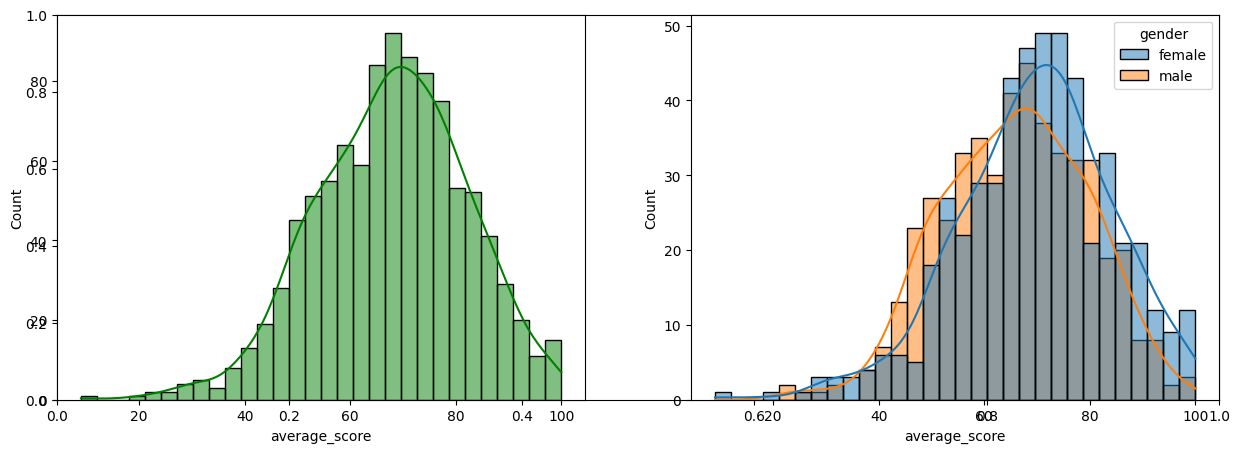

In [33]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(data=df, x='average_score', bins=30, kde=True, color='g')
plt.subplot(1,2,2)
sns.histplot(data=df, x='average_score', bins=30, kde=True, hue='gender')
plt.show()

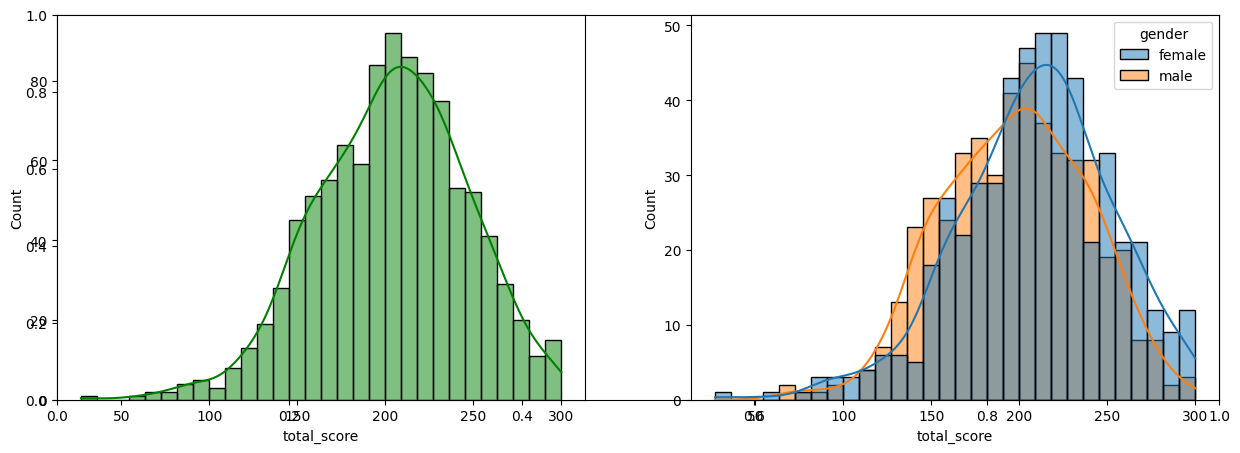

In [34]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(data=df, x='total_score', bins=30, kde=True, color='g')
plt.subplot(1,2,2)
sns.histplot(data=df, x='total_score', bins=30, kde=True, hue='gender')
plt.show()

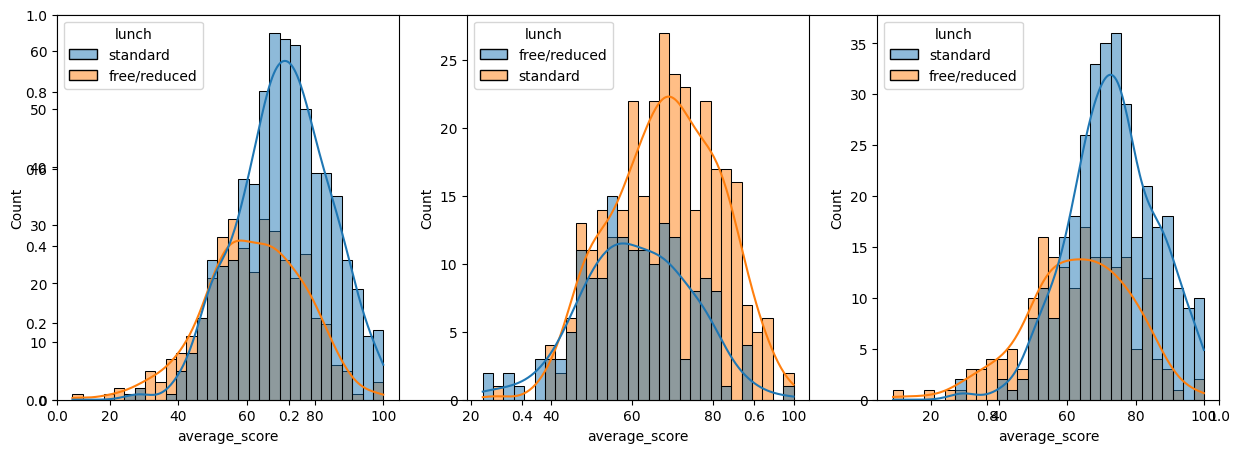

In [35]:
plt.subplots(figsize=(15,5))
plt.subplot(1,3,1)
sns.histplot(data=df, x='average_score', bins=30, kde=True,hue='lunch')
plt.subplot(1,3,2)
sns.histplot(data=df[df.gender=='male'], x='average_score', bins=30, kde=True, hue='lunch')
plt.subplot(1,3,3)
sns.histplot(data=df[df.gender=='female'], x='average_score', bins=30, kde=True, hue='lunch')
plt.show()

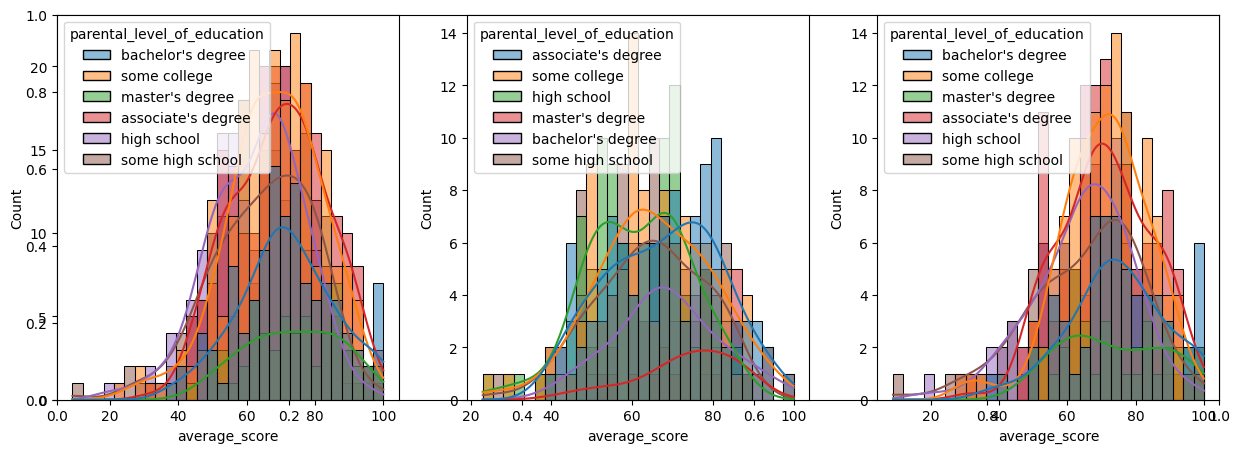

In [36]:
plt.subplots(figsize=(15,5))
plt.subplot(1,3,1)
sns.histplot(data=df, x='average_score', bins=30, kde=True,hue='parental_level_of_education')
plt.subplot(1,3,2)
sns.histplot(data=df[df.gender=='male'], x='average_score', bins=30, kde=True, hue='parental_level_of_education')
plt.subplot(1,3,3)
sns.histplot(data=df[df.gender=='female'], x='average_score', bins=30, kde=True, hue='parental_level_of_education')
plt.show()

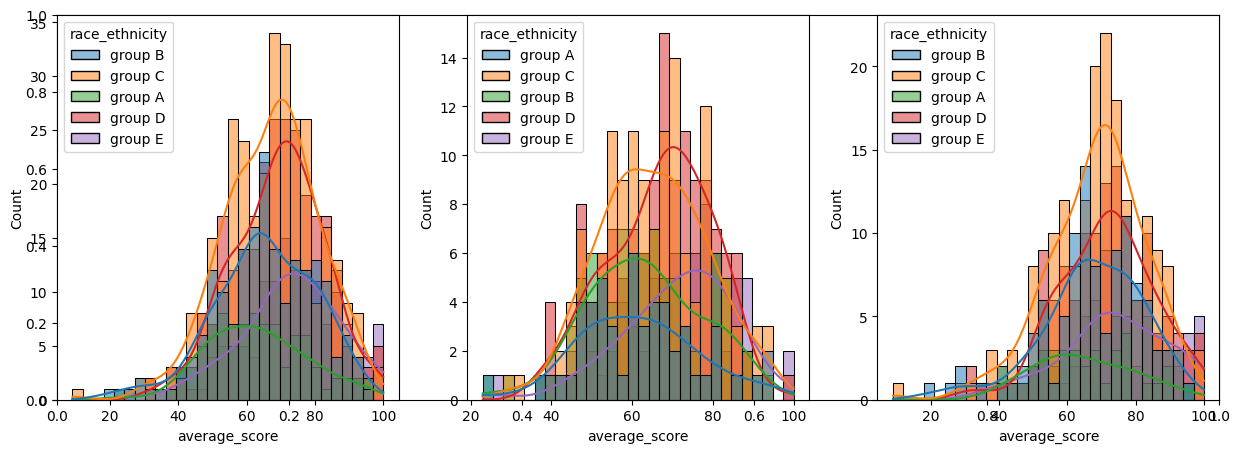

In [38]:
plt.subplots(figsize=(15,5))
plt.subplot(1,3,1)
sns.histplot(data=df, x='average_score', bins=30, kde=True,hue='race_ethnicity')
plt.subplot(1,3,2)
sns.histplot(data=df[df.gender=='male'], x='average_score', bins=30, kde=True, hue='race_ethnicity')
plt.subplot(1,3,3)
sns.histplot(data=df[df.gender=='female'], x='average_score', bins=30, kde=True, hue='race_ethnicity')
plt.show()

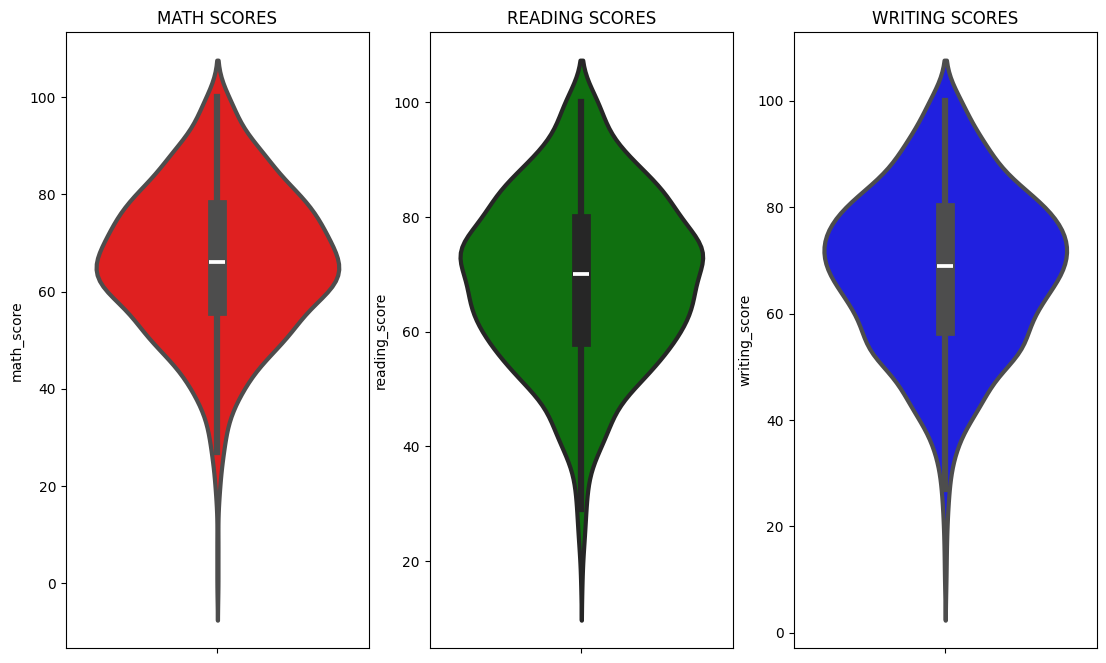

In [40]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

## Multivariate analysis

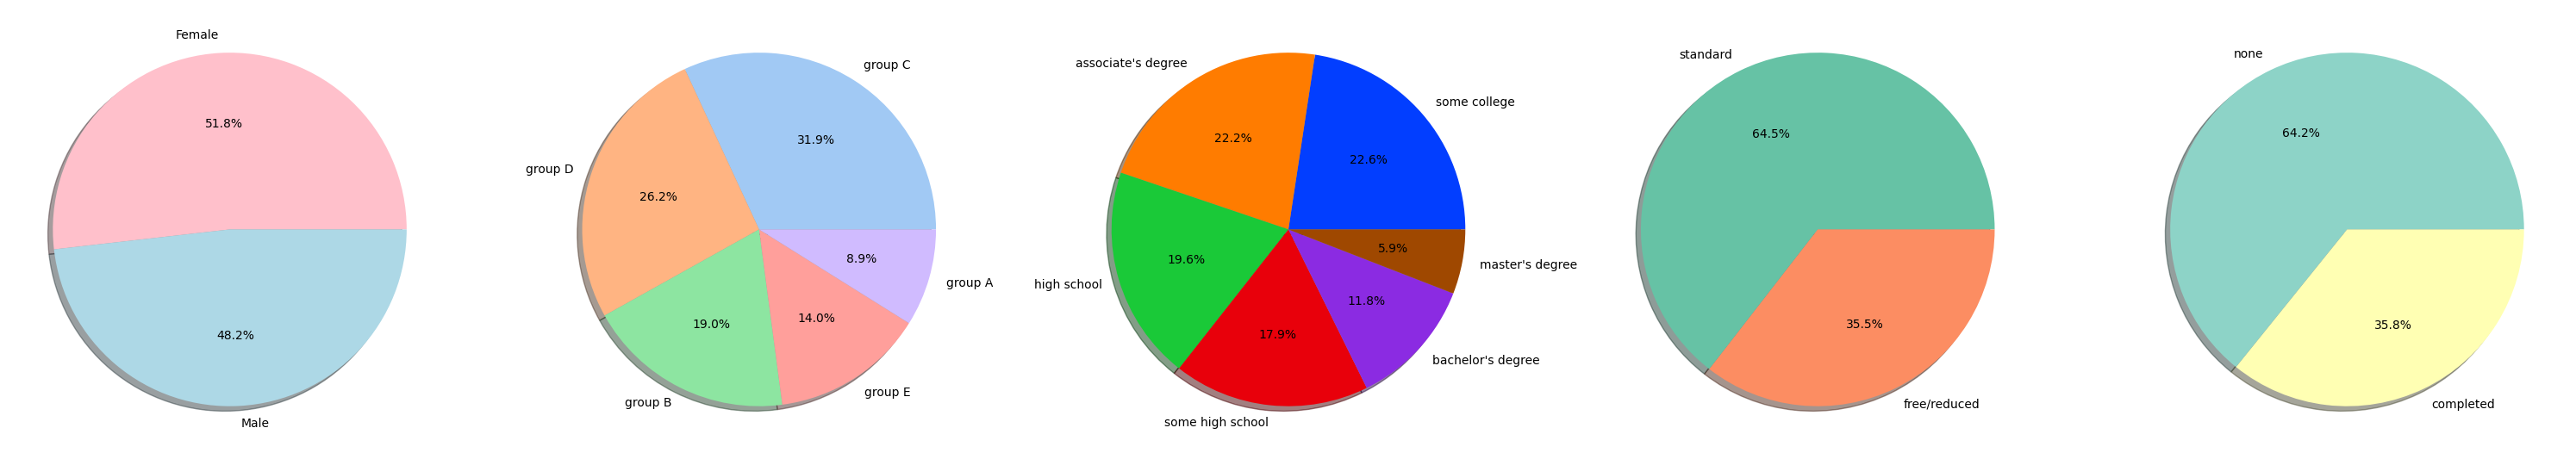

In [45]:
plt.rcParams['figure.figsize'] = (30, 12)
plt.subplot(1,5,1)
size=df['gender'].value_counts()
labels='Female','Male'
color=['pink','lightblue']
plt.pie(size, labels=labels, colors=color,autopct='%1.1f%%',shadow=True)

plt.subplot(1,5,2)
size=df['race_ethnicity'].value_counts()
labels=size.index
plt.pie(size, labels=labels, autopct='%1.1f%%',shadow=True,colors=sns.color_palette('pastel'))

plt.subplot(1,5,3)
size=df['parental_level_of_education'].value_counts()
labels=size.index
plt.pie(size, labels=labels, autopct='%1.1f%%',shadow=True,colors=sns.color_palette('bright'))

plt.subplot(1,5,4)
size=df['lunch'].value_counts()
labels=size.index
plt.pie(size, labels=labels, autopct='%1.1f%%',shadow=True,colors=sns.color_palette('Set2'))

plt.subplot(1,5,5)
size=df['test_preparation_course'].value_counts()
labels=size.index
plt.pie(size, labels=labels, autopct='%1.1f%%',shadow=True,colors=sns.color_palette('Set3'))

plt.tight_layout()
plt.grid()
plt.show()


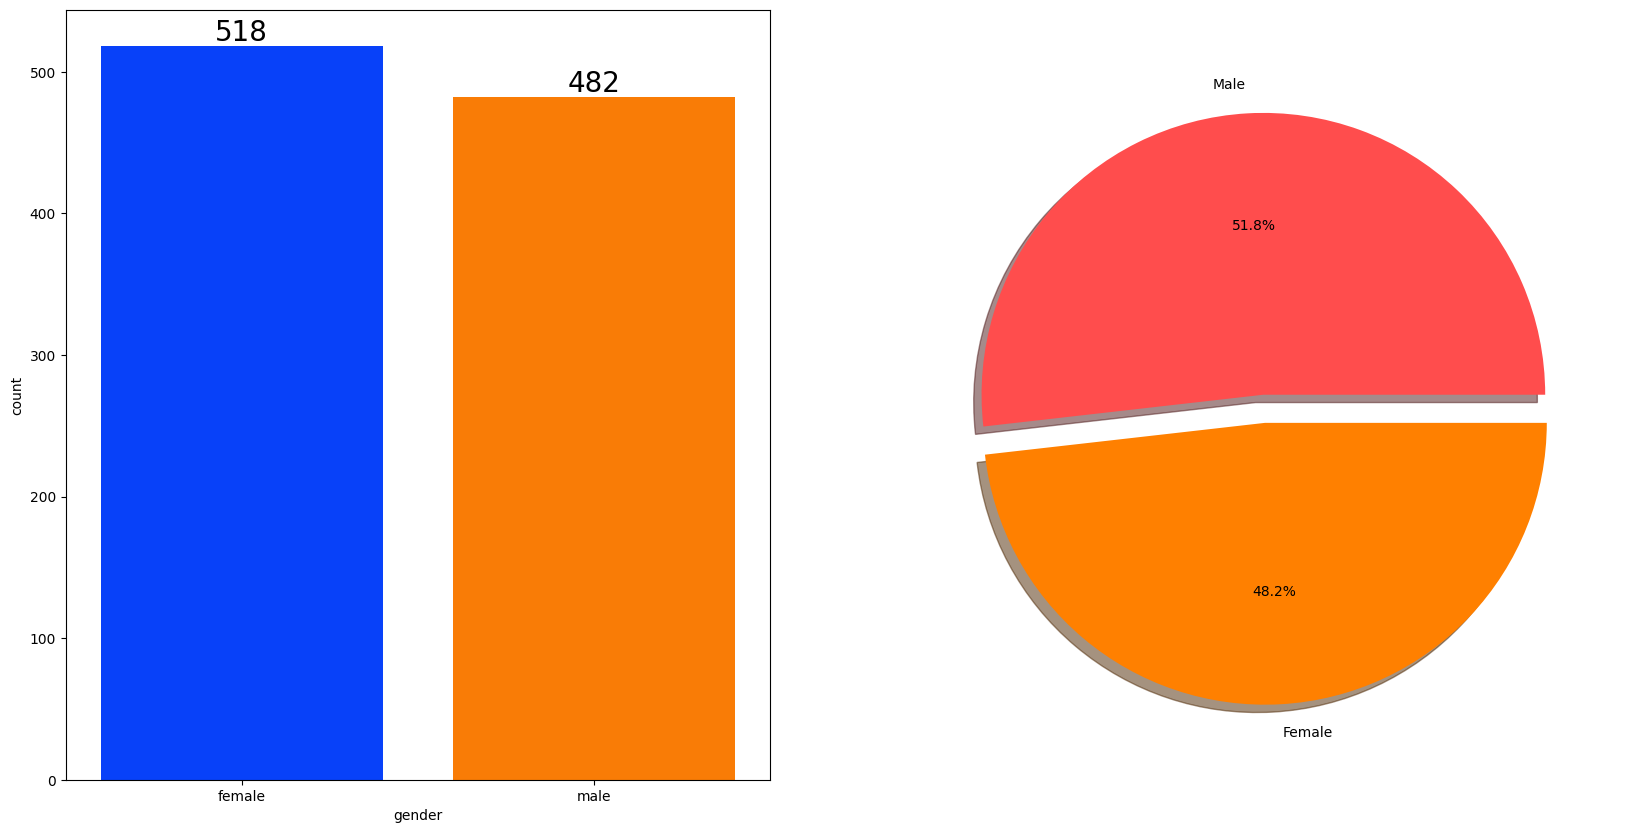

In [46]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

In [48]:
gender_group = df.groupby('gender').mean(numeric_only=True)
gender_group

,math_score,reading_score,writing_score,total_score,average_score
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


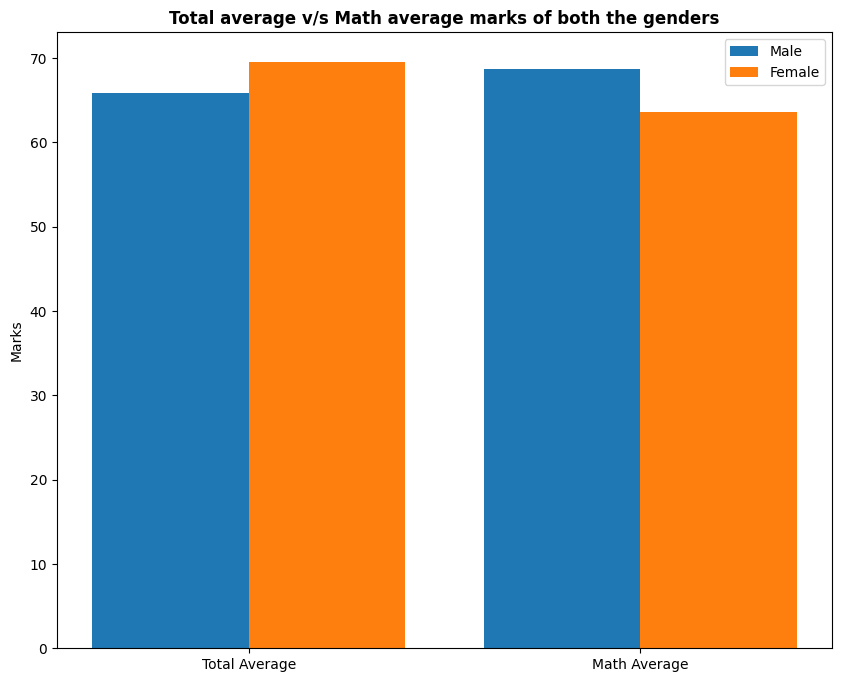

In [51]:
plt.figure(figsize=(10, 8))
X = ['Total Average','Math Average']
female_scores = [gender_group['average_score'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average_score'][1], gender_group['math_score'][1]]
X_axis = np.arange(len(X))
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

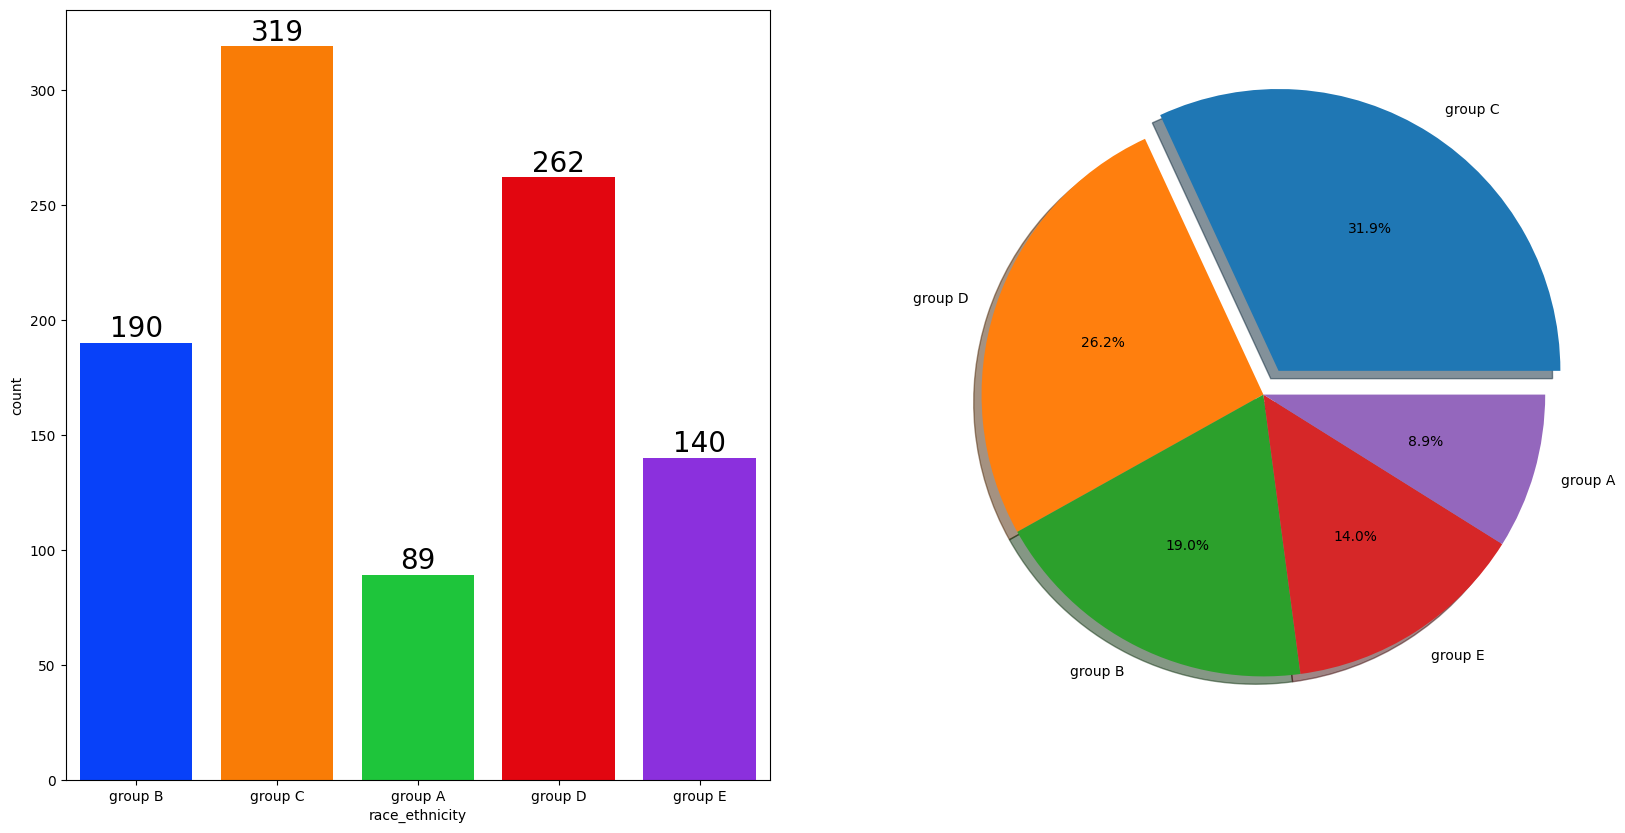

In [52]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

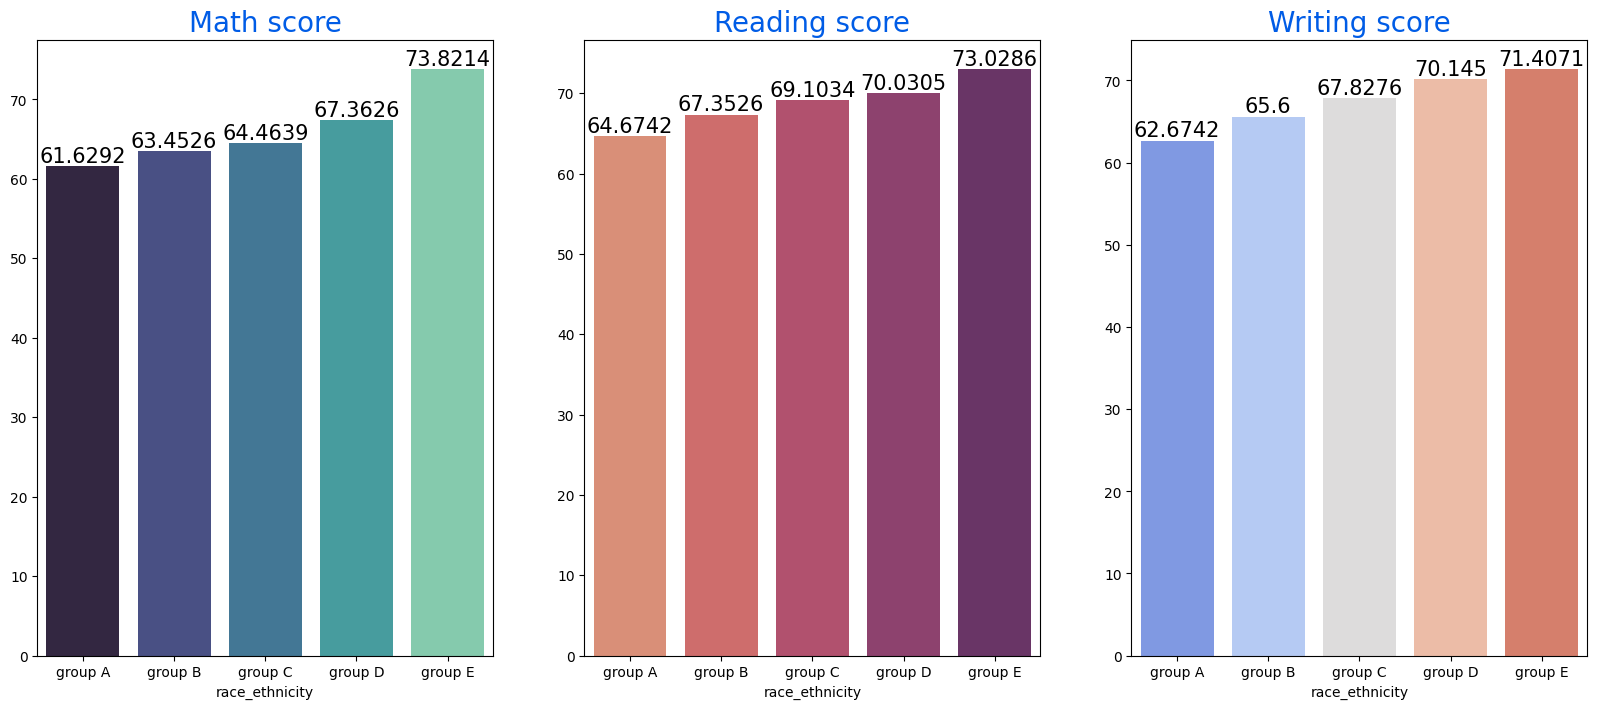

In [54]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

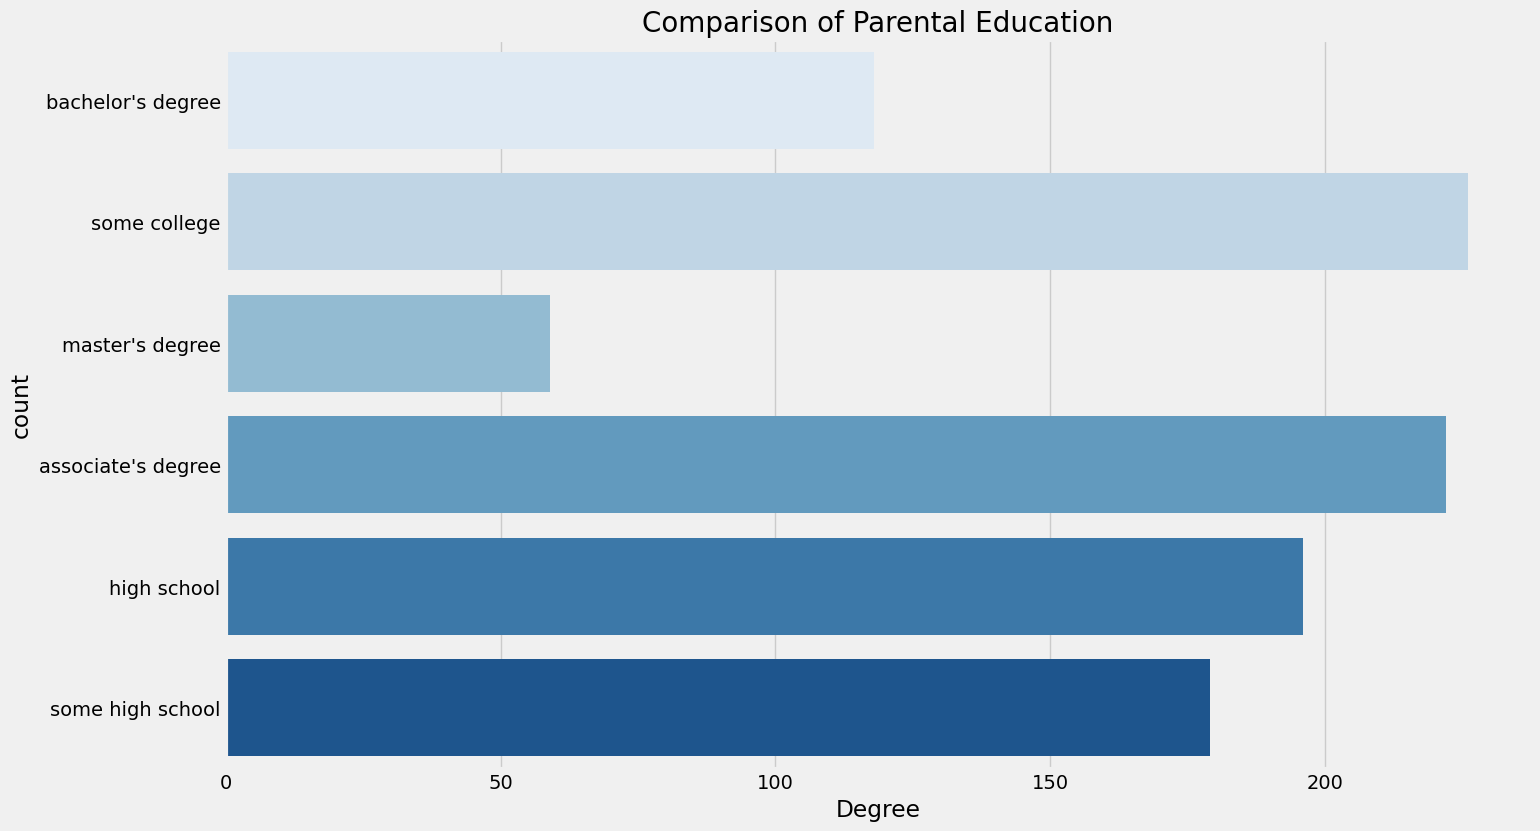

In [56]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

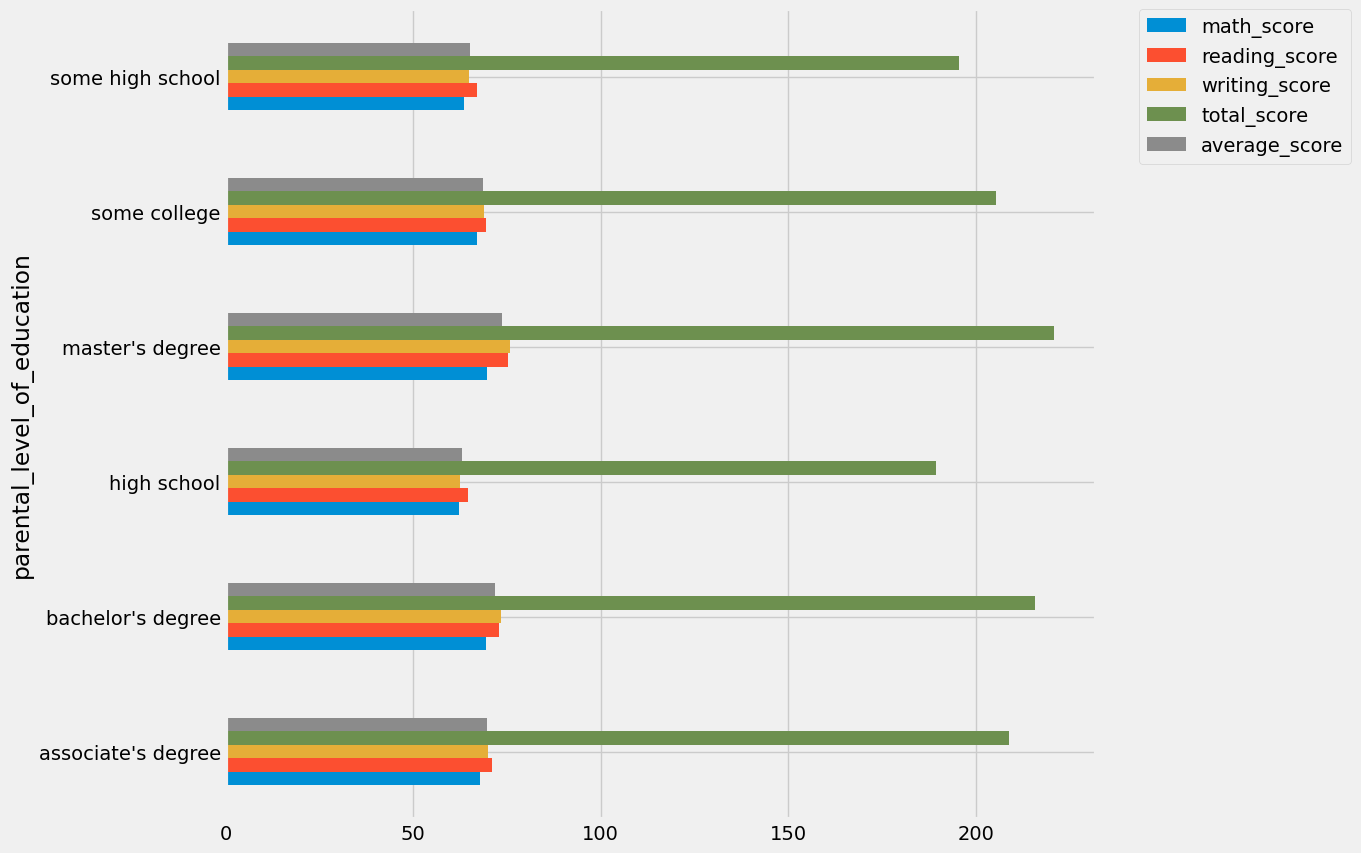

In [59]:
# aggregate only numeric columns to avoid TypeError with object dtypes
df.groupby('parental_level_of_education').mean(numeric_only=True).plot(kind='barh', figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

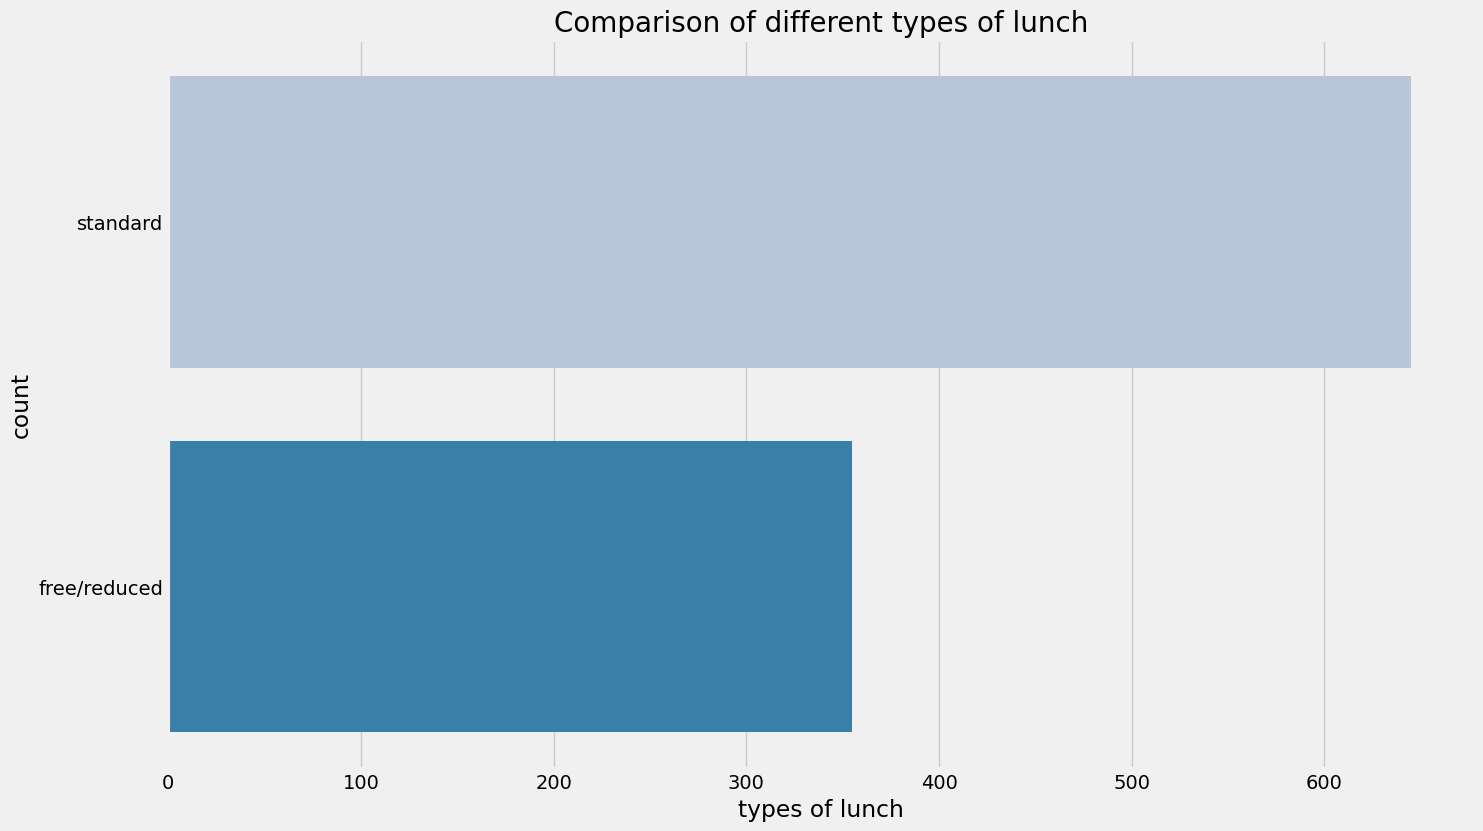

In [61]:
plt.rcParams['figure.figsize'] = (15, 9)
#plt.style.use('seaborn-talk')
sns.countplot(df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

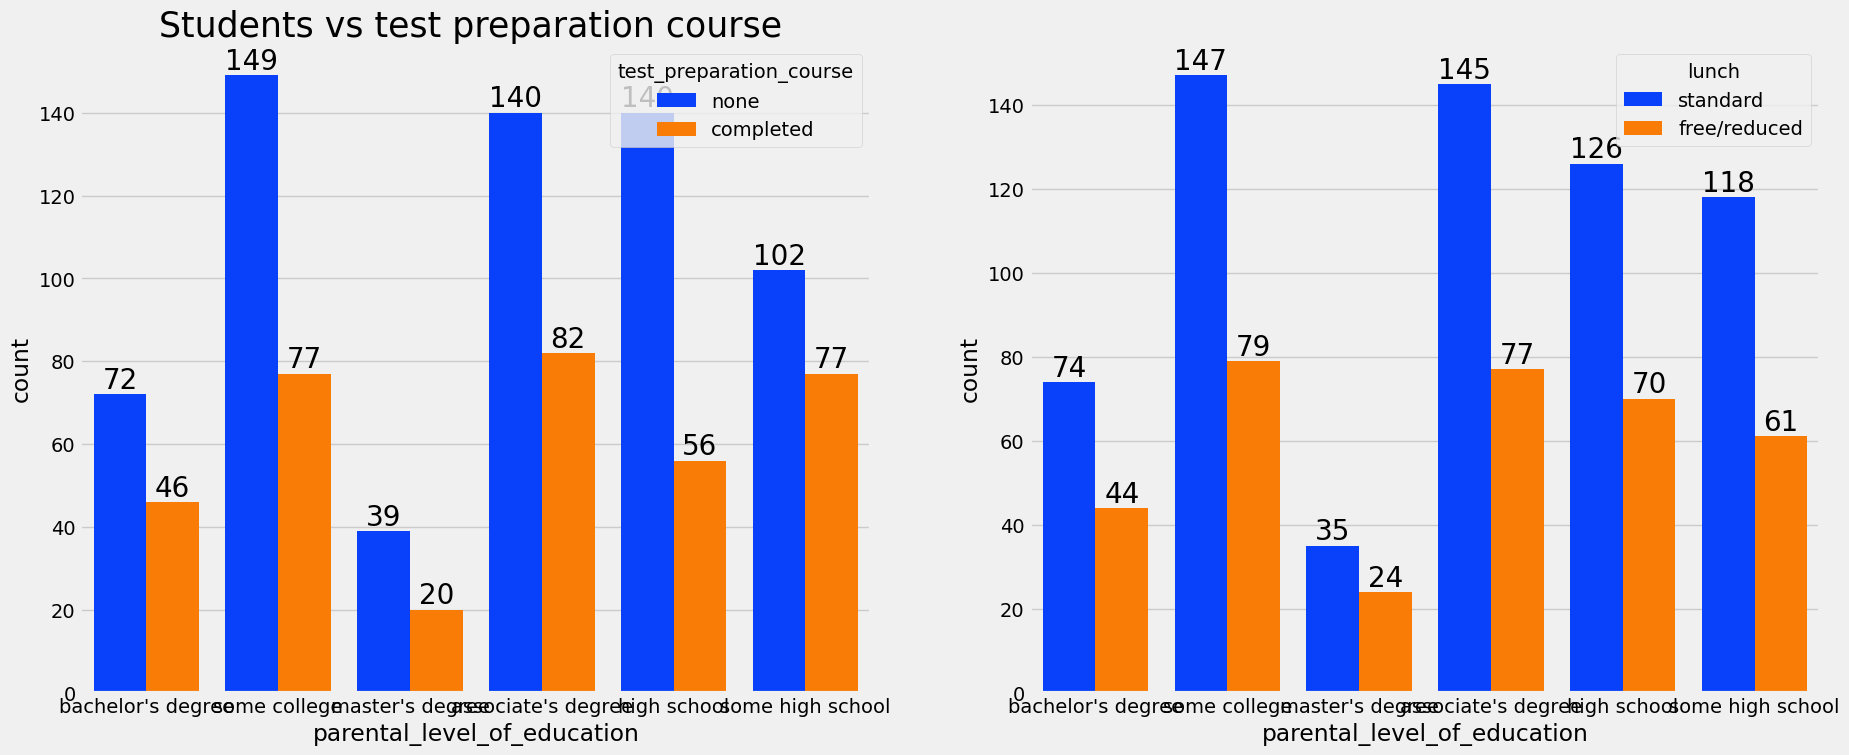

In [64]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='test_preparation_course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)   

<Axes: xlabel='lunch', ylabel='writing_score'>

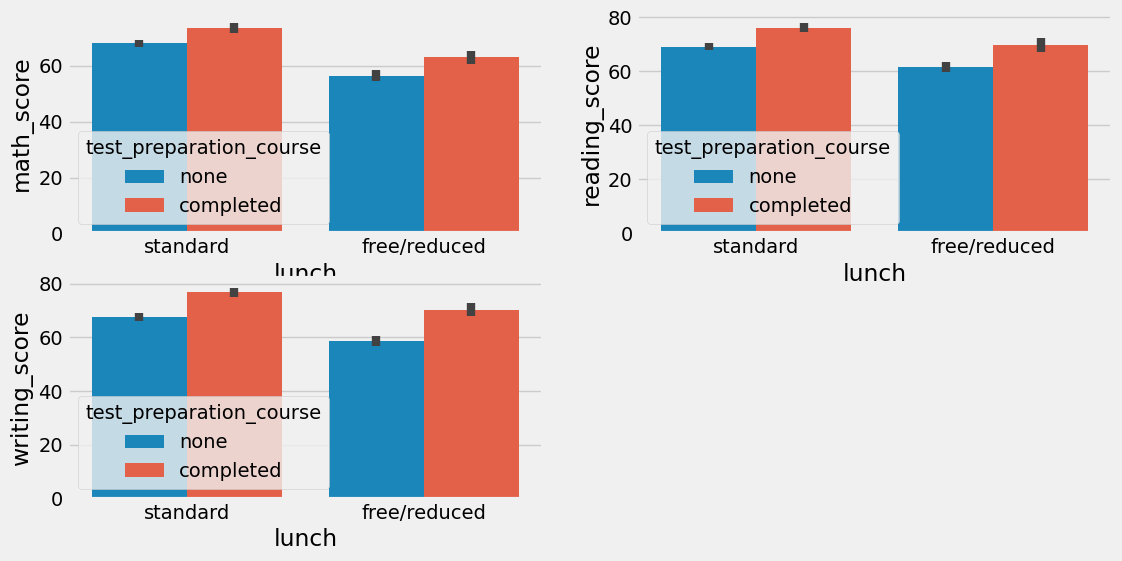

In [66]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])

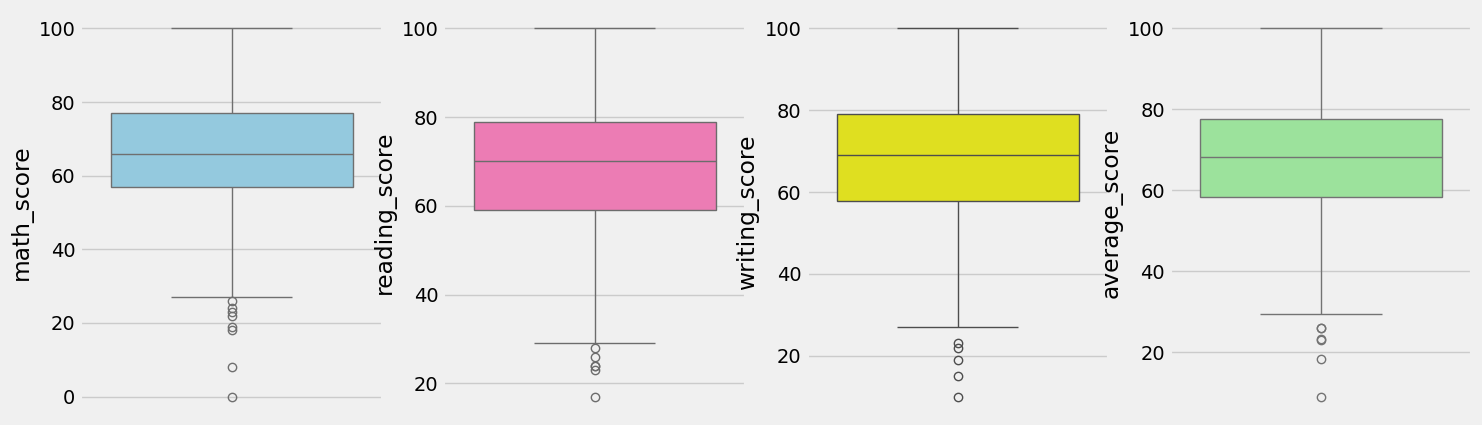

In [68]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average_score'],color='lightgreen')
plt.show()

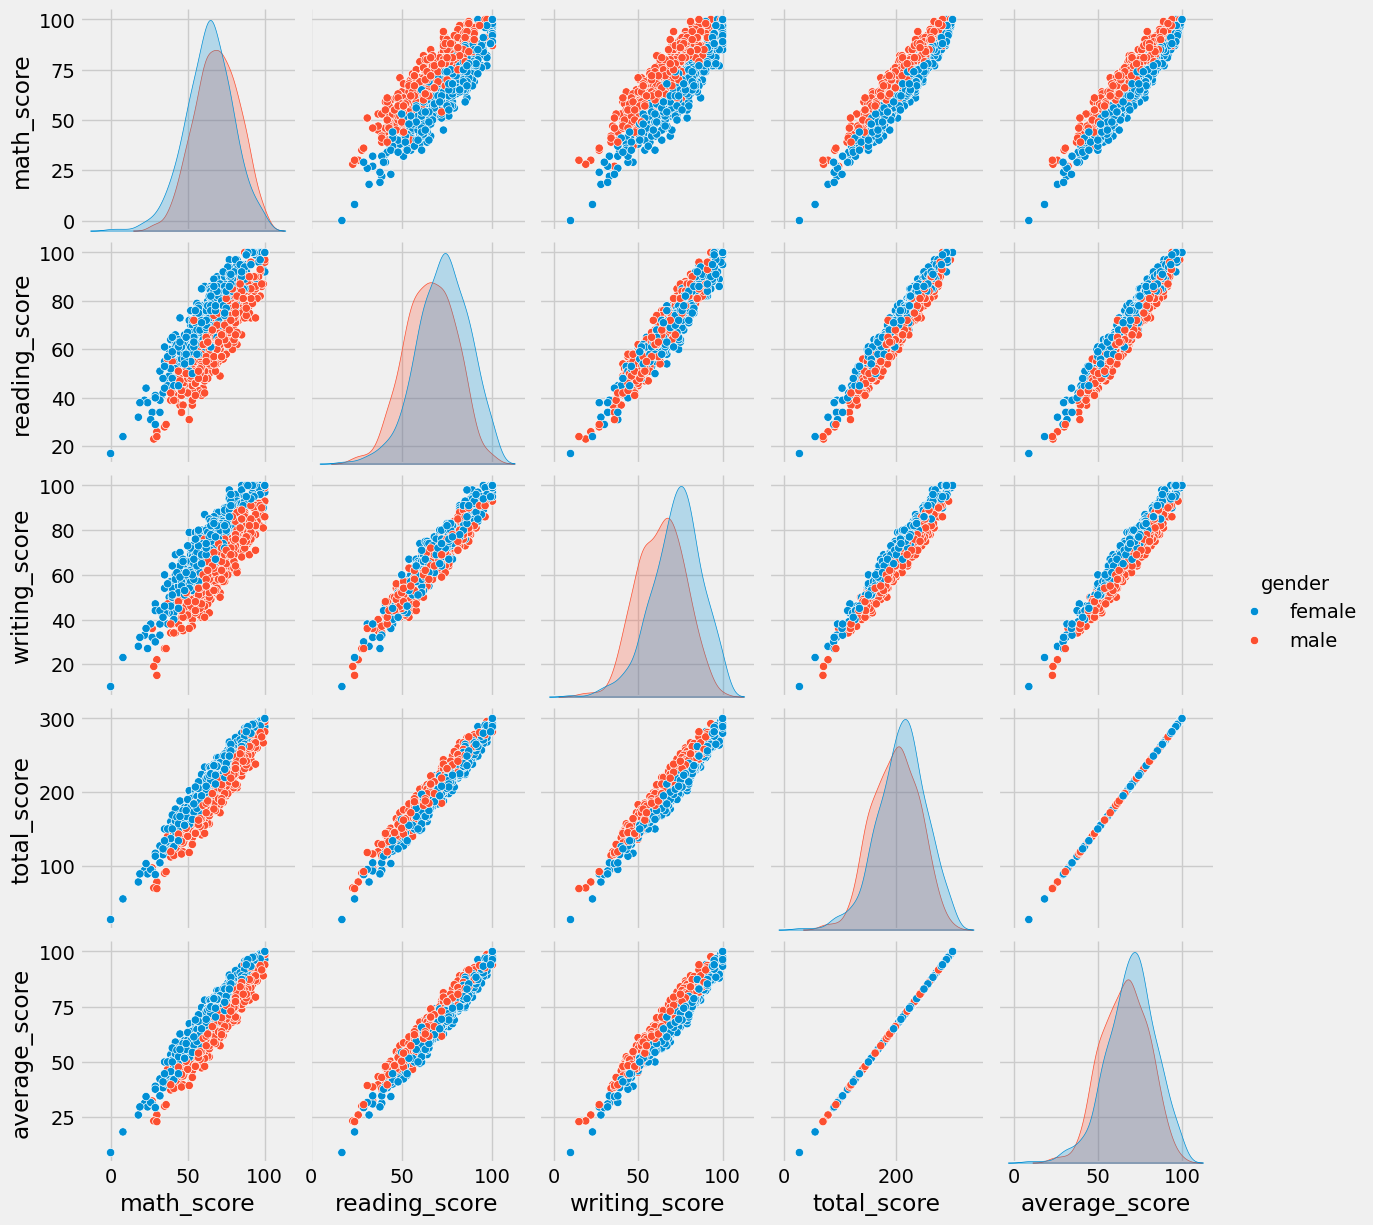

In [69]:
sns.pairplot(df,hue = 'gender')
plt.show()